In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# from google.colab import drive
# drive.mount("/content/drive")

In [6]:
df = pd.read_csv('/home/thu/LaptrinhAI/Final_term/hanoi-aqi-weather-data.csv',
                 parse_dates=['Local Time', 'UTC Time'],
                 index_col=['Local Time'])
df.head()

,UTC Time,City,Country Code,Timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
Local Time,,,,,,,,,,,,,,,,,,
2023-06-08 00:00:00,2023-06-07 17:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,168.7,32.3,74.7,52.5,42.0,57.3,37,0.5,1004,87,29.3,0.0,1.33
2023-06-08 01:00:00,2023-06-07 18:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,115,169.8,32.0,66.0,51.3,41.0,64.0,50,1.0,1004,88,29.0,0.0,1.00
2023-06-08 02:00:00,2023-06-07 19:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,112,166.7,29.3,63.7,50.0,40.0,66.0,62,1.0,1003,89,28.9,0.0,0.66
2023-06-08 03:00:00,2023-06-07 20:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,121,163.6,26.7,61.3,53.8,43.0,68.0,75,0.5,1003,90,28.7,0.0,0.33
2023-06-08 04:00:00,2023-06-07 21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,134,160.5,24.0,59.0,60.0,48.0,70.0,87,0.0,1003,92,28.6,0.0,1.20


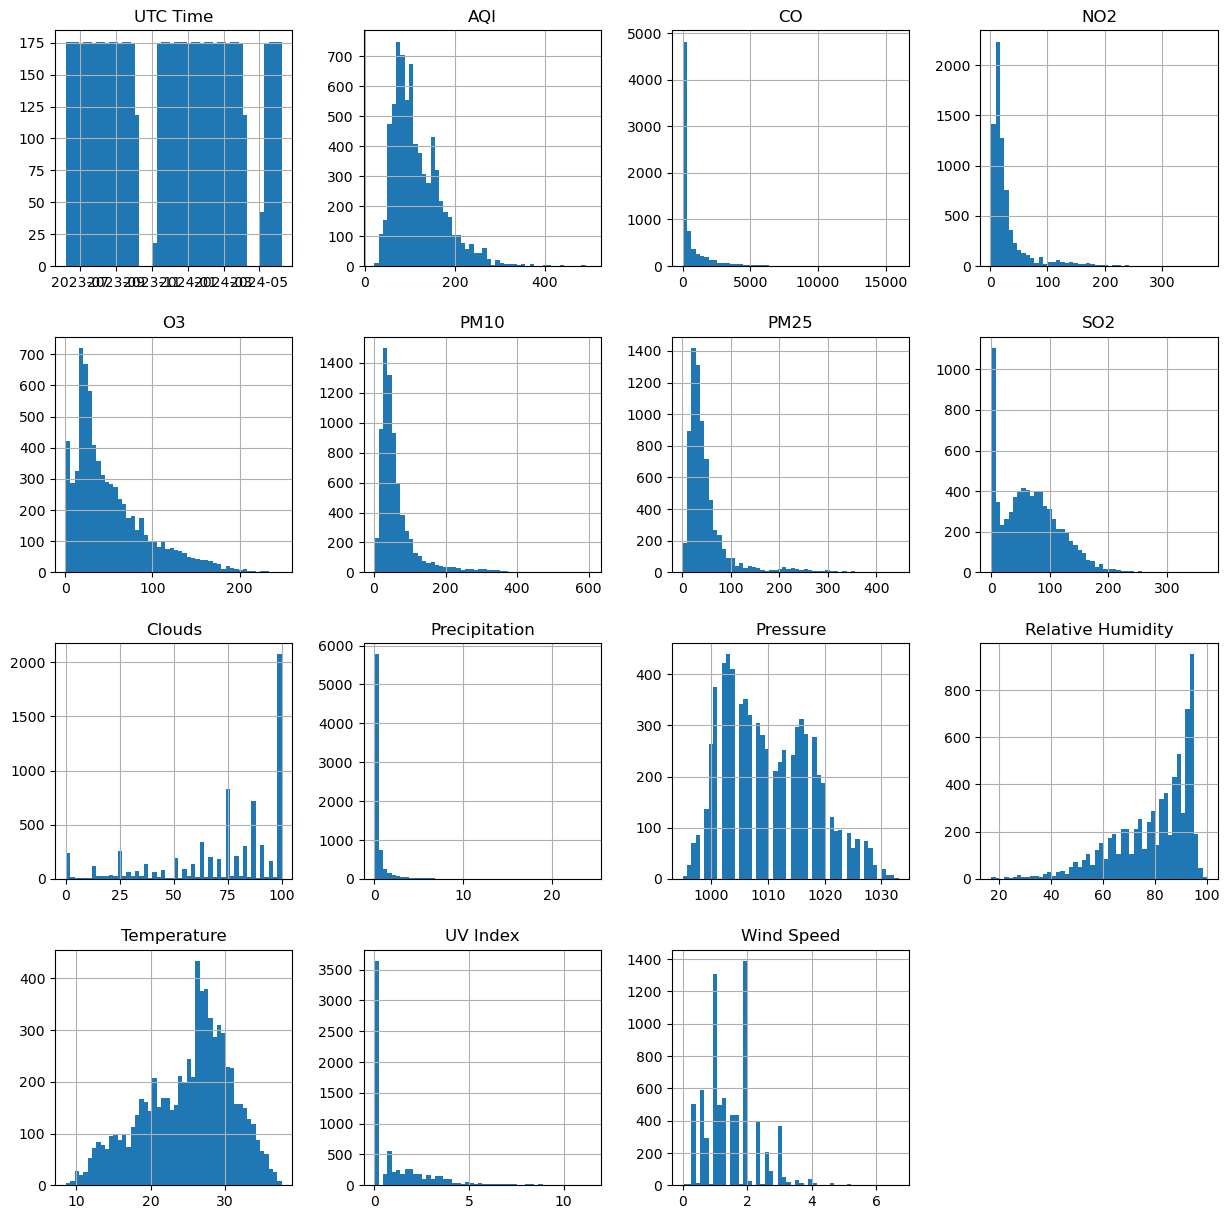

In [7]:
df.hist(bins=50, figsize=(15,15));

# Data Wrangle


## Split data train, test

In [8]:
# the idea is the split the dataset into two parts, one for training, and one for validation
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
# now we can split them with a ratio like this
train_set, test_set = split_train_test(df, 0.2)

In [10]:
len(train_set)

5859

In [11]:
len(test_set)

1464

In [12]:
# however, the sklearn library has such unility
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=2020)
print(len(train_set))
train_set.head()

5858


,UTC Time,City,Country Code,Timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
Local Time,,,,,,,,,,,,,,,,,,
2023-07-14 10:00:00,2023-07-14 03:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,61,88.7,6.0,121.0,21.3,17.00,74.0,87,0.0,1003,66,33.7,6.6,2.00
2024-05-25 04:00:00,2024-05-24 21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,62,1521.3,22.6,21.6,25.8,17.42,4.0,100,0.5,1006,94,26.6,0.0,2.00
2023-12-18 04:00:00,2023-12-17 21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,157,165.7,25.0,12.0,76.0,61.00,169.0,100,0.0,1020,67,14.0,0.0,1.20
2023-06-11 18:00:00,2023-06-11 11:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,153,214.8,43.7,120.7,72.5,58.00,81.7,75,0.0,998,57,34.0,0.7,0.66
2024-01-22 14:00:00,2024-01-22 07:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,54,20.0,120.0,2.3,18.0,14.00,24.0,100,0.0,1022,74,12.1,1.7,4.33


## Fill NaN values

In [14]:
# make a copy and test out
df1 = df.copy(deep=True)

In [15]:
# calculate the median of the Windspeed (WS) input
median = df1['Wind Speed'].median()

In [16]:
df1.head(5)

,UTC Time,City,Country Code,Timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
Local Time,,,,,,,,,,,,,,,,,,
2023-06-08 00:00:00,2023-06-07 17:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,168.7,32.3,74.7,52.5,42.0,57.3,37,0.5,1004,87,29.3,0.0,1.33
2023-06-08 01:00:00,2023-06-07 18:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,115,169.8,32.0,66.0,51.3,41.0,64.0,50,1.0,1004,88,29.0,0.0,1.00
2023-06-08 02:00:00,2023-06-07 19:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,112,166.7,29.3,63.7,50.0,40.0,66.0,62,1.0,1003,89,28.9,0.0,0.66
2023-06-08 03:00:00,2023-06-07 20:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,121,163.6,26.7,61.3,53.8,43.0,68.0,75,0.5,1003,90,28.7,0.0,0.33
2023-06-08 04:00:00,2023-06-07 21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,134,160.5,24.0,59.0,60.0,48.0,70.0,87,0.0,1003,92,28.6,0.0,1.20


In [17]:
df1['Wind Speed'].fillna(median, inplace=True)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7323 entries, 2023-06-08 00:00:00 to 2024-06-08 00:00:00
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   UTC Time           7323 non-null   datetime64[ns]
 1   City               7323 non-null   object        
 2   Country Code       7323 non-null   object        
 3   Timezone           7323 non-null   object        
 4   AQI                7323 non-null   int64         
 5   CO                 7323 non-null   float64       
 6   NO2                7323 non-null   float64       
 7   O3                 7323 non-null   float64       
 8   PM10               7323 non-null   float64       
 9   PM25               7323 non-null   float64       
 10  SO2                7323 non-null   float64       
 11  Clouds             7323 non-null   int64         
 12  Precipitation      7323 non-null   float64       
 13  Pressure           7323 non

In [19]:
# and sklearn has the Class to do such
from sklearn.impute import SimpleImputer


In [20]:
inputer = SimpleImputer(strategy='median')

In [21]:
df2 =df[df.columns[5:]].copy(deep=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7323 entries, 2023-06-08 00:00:00 to 2024-06-08 00:00:00
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CO                 7323 non-null   float64
 1   NO2                7323 non-null   float64
 2   O3                 7323 non-null   float64
 3   PM10               7323 non-null   float64
 4   PM25               7323 non-null   float64
 5   SO2                7323 non-null   float64
 6   Clouds             7323 non-null   int64  
 7   Precipitation      7323 non-null   float64
 8   Pressure           7323 non-null   int64  
 9   Relative Humidity  7323 non-null   int64  
 10  Temperature        7323 non-null   float64
 11  UV Index           7323 non-null   float64
 12  Wind Speed         7323 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 801.0 KB


In [22]:
# evaluate df2
inputer.fit(df2)

SimpleImputer(strategy='median')

In [23]:
# see the statistic, median in this case
inputer.statistics_

array([2.020e+02, 1.730e+01, 3.900e+01, 4.600e+01, 3.500e+01, 6.300e+01,
       7.900e+01, 0.000e+00, 1.009e+03, 8.400e+01, 2.620e+01, 6.000e-01,
       1.330e+00])

In [24]:
df2.head(5)

,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
Local Time,,,,,,,,,,,,,
2023-06-08 00:00:00,168.7,32.3,74.7,52.5,42.0,57.3,37,0.5,1004,87,29.3,0.0,1.33
2023-06-08 01:00:00,169.8,32.0,66.0,51.3,41.0,64.0,50,1.0,1004,88,29.0,0.0,1.00
2023-06-08 02:00:00,166.7,29.3,63.7,50.0,40.0,66.0,62,1.0,1003,89,28.9,0.0,0.66
2023-06-08 03:00:00,163.6,26.7,61.3,53.8,43.0,68.0,75,0.5,1003,90,28.7,0.0,0.33
2023-06-08 04:00:00,160.5,24.0,59.0,60.0,48.0,70.0,87,0.0,1003,92,28.6,0.0,1.20


In [25]:
# transform is doing the work
df2full = inputer.transform(df2)

In [26]:
# convert the inputed dataset and  compared
df2 = pd.DataFrame(data=df2full, columns=df1.columns[5:])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CO                 7323 non-null   float64
 1   NO2                7323 non-null   float64
 2   O3                 7323 non-null   float64
 3   PM10               7323 non-null   float64
 4   PM25               7323 non-null   float64
 5   SO2                7323 non-null   float64
 6   Clouds             7323 non-null   float64
 7   Precipitation      7323 non-null   float64
 8   Pressure           7323 non-null   float64
 9   Relative Humidity  7323 non-null   float64
 10  Temperature        7323 non-null   float64
 11  UV Index           7323 non-null   float64
 12  Wind Speed         7323 non-null   float64
dtypes: float64(13)
memory usage: 743.9 KB


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7323 entries, 2023-06-08 00:00:00 to 2024-06-08 00:00:00
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   UTC Time           7323 non-null   datetime64[ns]
 1   City               7323 non-null   object        
 2   Country Code       7323 non-null   object        
 3   Timezone           7323 non-null   object        
 4   AQI                7323 non-null   int64         
 5   CO                 7323 non-null   float64       
 6   NO2                7323 non-null   float64       
 7   O3                 7323 non-null   float64       
 8   PM10               7323 non-null   float64       
 9   PM25               7323 non-null   float64       
 10  SO2                7323 non-null   float64       
 11  Clouds             7323 non-null   int64         
 12  Precipitation      7323 non-null   float64       
 13  Pressure           7323 non

In [130]:
# you can save to a file with all missing values filled
df.to_csv('/home/thu/LaptrinhAI/Final_term/filled_PM2.5_Hanoi_2023.csv')

## Additional Cleanup

In [29]:
cot = df.columns
cot

Index(['UTC Time', 'City', 'Country Code', 'Timezone', 'AQI', 'CO', 'NO2',
       'O3', 'PM10', 'PM25', 'SO2', 'Clouds', 'Precipitation', 'Pressure',
       'Relative Humidity', 'Temperature', 'UV Index', 'Wind Speed'],
      dtype='object')

<Axes: >

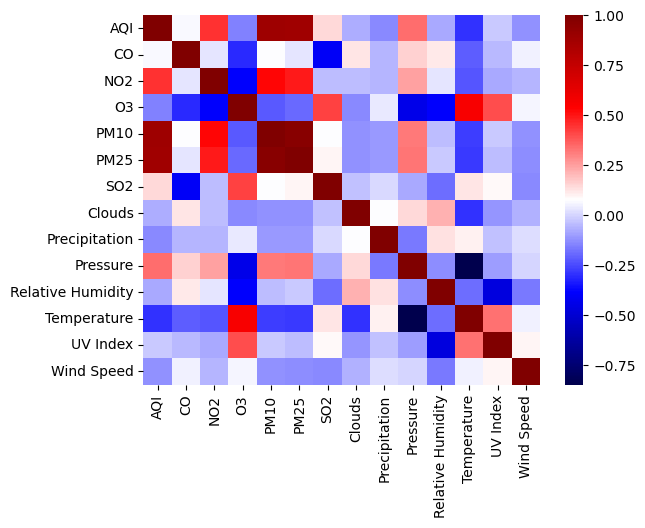

In [30]:
# let return back to the original dataset (df) before fill up NaN
df_num = df[['AQI', 'CO', 'NO2',
       'O3', 'PM10', 'PM25', 'SO2', 'Clouds', 'Precipitation', 'Pressure',
       'Relative Humidity', 'Temperature', 'UV Index', 'Wind Speed']]
data = df_num.copy(deep=True)
sns.heatmap(data.corr(), cmap='seismic')

In [31]:
data.head(1)

,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
Local Time,,,,,,,,,,,,,,
2023-06-08,118,168.7,32.3,74.7,52.5,42.0,57.3,37,0.5,1004,87,29.3,0.0,1.33


<Axes: >

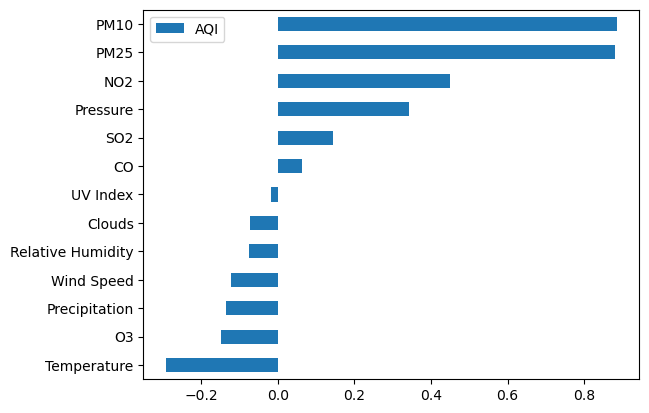

In [32]:
# and only correlation with PM2.5
data.corr()['AQI'].sort_values().to_frame().drop('AQI').plot.barh()

In [33]:
data.columns

Index(['AQI', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2', 'Clouds',
       'Precipitation', 'Pressure', 'Relative Humidity', 'Temperature',
       'UV Index', 'Wind Speed'],
      dtype='object')

In [34]:
# drop some columns either weak in correation or dependent (redundant) to other inputs
data.drop(columns=['CO', 'Clouds', 'UV Index', 'SO2'], inplace=True)

In [35]:
data.head()

,AQI,NO2,O3,PM10,PM25,Precipitation,Pressure,Relative Humidity,Temperature,Wind Speed
Local Time,,,,,,,,,,
2023-06-08 00:00:00,118,32.3,74.7,52.5,42.0,0.5,1004,87,29.3,1.33
2023-06-08 01:00:00,115,32.0,66.0,51.3,41.0,1.0,1004,88,29.0,1.00
2023-06-08 02:00:00,112,29.3,63.7,50.0,40.0,1.0,1003,89,28.9,0.66
2023-06-08 03:00:00,121,26.7,61.3,53.8,43.0,0.5,1003,90,28.7,0.33
2023-06-08 04:00:00,134,24.0,59.0,60.0,48.0,0.0,1003,92,28.6,1.20


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7323 entries, 2023-06-08 00:00:00 to 2024-06-08 00:00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AQI                7323 non-null   int64  
 1   NO2                7323 non-null   float64
 2   O3                 7323 non-null   float64
 3   PM10               7323 non-null   float64
 4   PM25               7323 non-null   float64
 5   Precipitation      7323 non-null   float64
 6   Pressure           7323 non-null   int64  
 7   Relative Humidity  7323 non-null   int64  
 8   Temperature        7323 non-null   float64
 9   Wind Speed         7323 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 629.3 KB


Split features(meteorological inputs) and label (AQI)

In [37]:
# let make X as the matrix for the feature (or inputs)
X = data.drop('AQI', axis=1)

In [38]:
# and lowercase y as the label (or the value of the target)
y = data['AQI'].copy()

In [39]:
# let build the inpute instance to work with whole data at one
# to inpute more than one columns, we can use this
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [40]:

# transform data from real value to a relative to the set
from sklearn.preprocessing import StandardScaler

In [41]:

# we have all column with numeric values
num_attrs = list(data.columns)
num_attrs.remove('AQI')
num_attrs

['NO2',
 'O3',
 'PM10',
 'PM25',
 'Precipitation',
 'Pressure',
 'Relative Humidity',
 'Temperature',
 'Wind Speed']

In [42]:
# first is the trategy for inputer using median
# then convert the absolute value in the each column using the Standard Class
num_pipeline = Pipeline([
        ('inputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
        ])

In [43]:
# and instance to tranform all column at one
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs)
])

In [44]:
# or building a function to do all in one step
def inpute_transfrom(data=None):
    num_pipeline = Pipeline([
        ('inputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
        ])
    num_attrs = list(data.columns)
    full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attrs)
        ])
    return full_pipeline.fit_transform(data) # return a numpy array


In [45]:
X_scaled = inpute_transfrom(data=X)

In [46]:
# how do we know that the data has been fixed properly
X_scaled_test = inpute_transfrom(data=X)
dft = pd.DataFrame(data=X_scaled_test, columns=num_attrs)
dft.info()
# looking good
del dft

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NO2                7323 non-null   float64
 1   O3                 7323 non-null   float64
 2   PM10               7323 non-null   float64
 3   PM25               7323 non-null   float64
 4   Precipitation      7323 non-null   float64
 5   Pressure           7323 non-null   float64
 6   Relative Humidity  7323 non-null   float64
 7   Temperature        7323 non-null   float64
 8   Wind Speed         7323 non-null   float64
dtypes: float64(9)
memory usage: 515.0 KB


In [47]:
# now we can split data, the test_size is the portion of data use for validation
# random_state is to provide consistent if you want to replicate the result
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.33, random_state=2020)

# Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lin_reg = LinearRegression()

In [50]:
# and training the model using the _train dataset
lin_reg.fit(X_train, y_train)

LinearRegression()

In [51]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [52]:
# let see the output of the mode
lin_reg.coef_

array([ 0.25598301,  5.21110093, 31.39264799, 17.66429258, -1.50011238,
        0.75474056, -1.6081193 , -5.29596683, -1.48906922])

In [53]:
# predict based on the training set
y_train_prd = lin_reg.predict(X_train)

(0.0, 500.0)

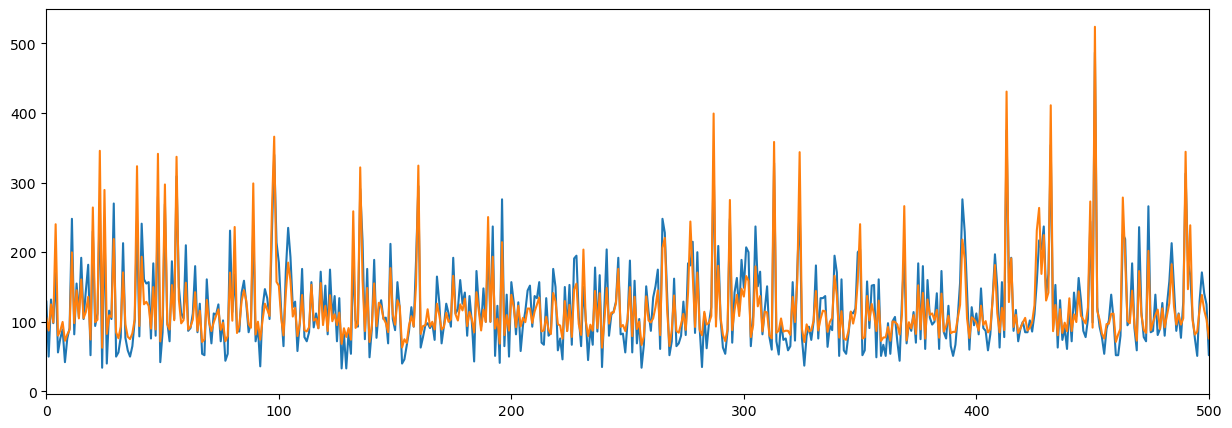

In [54]:
# let see how the label (y_train), and predicting of the label (y_prd)
plt.figure(figsize=(15,5))
plt.plot(y_train.to_list())#mau xanh
plt.plot(y_train_prd)#mau vang
plt.xlim(0,500)

Nhận xét: Model chưa dự đoán được


In [55]:
# more important, how about with validation set (test set)
y_test_prd = lin_reg.predict(X_test)

(0.0, 500.0)

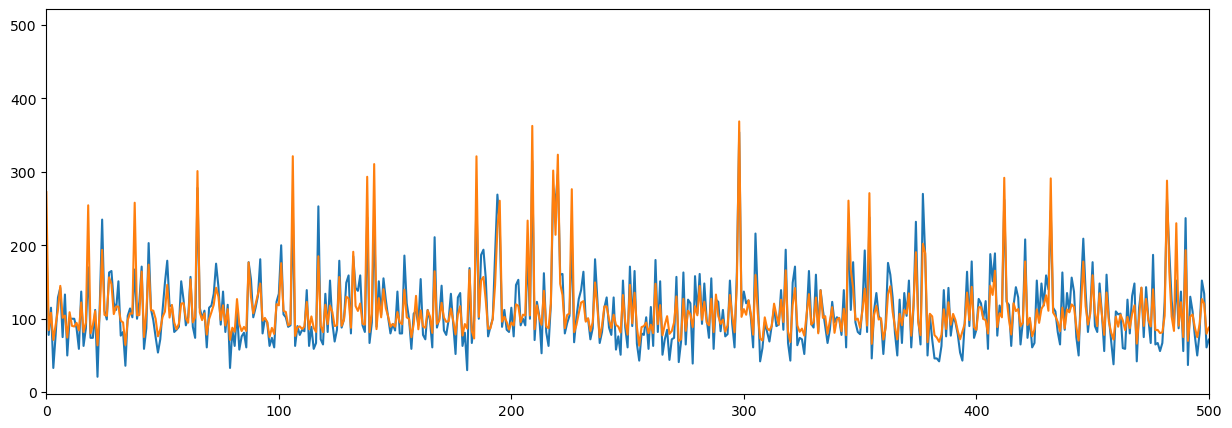

In [56]:
plt.figure(figsize=(15,5))
plt.plot(y_test.to_list())
plt.plot(y_test_prd)
plt.xlim(0,500)

Nhận xét: model dự đoán chưa chính xác

# evaluate model performance

In [57]:
# for numeric data, one simple way to to see how far
# between the prediction and the garget
from sklearn.metrics import mean_squared_error

In [58]:
# on training set
lin_train_mse = mean_squared_error(y_train, y_train_prd)
print('Trainset: Root Squared Mean Error', np.sqrt(lin_train_mse))

Trainset: Root Squared Mean Error 25.043491382733293


Nhận xét: RMSE(độ lệch bình phương giữa giá trị thực tế và giá trị dụ đoán)

In [59]:
# on test set
lin_test_mse = mean_squared_error(y_test, y_test_prd)
print('Test set: Root Squared Mean Error', np.sqrt(lin_test_mse))

Test set: Root Squared Mean Error 24.421676605645956


Nhận xét: RMSE thấp hơn trên testset, cho thấy model chưa hoàn toán bị overfitting, nhưng có khả năng khái quát tốt hơn cho dữ liệu mới

In [60]:
# the average value label set (y set)
y.mean()

116.58568892530384

In [61]:
# relative error
print(f'Relative Error: {100*np.sqrt(lin_test_mse)/y.mean():.0f}%')

Relative Error: 21%


In [62]:
results = dict()
def add_stats(model=None, train_rmse=None, test_rmse=None):
    global results
    results[model] = {'train_rmse': round(train_rmse,1),
                     'test_rmse': round(test_rmse, 1)}
    return None

In [63]:
add_stats(model='linear reg',
         train_rmse=np.sqrt(lin_train_mse),
         test_rmse=np.sqrt(lin_test_mse))
results

{'linear reg': {'train_rmse': 25.0, 'test_rmse': 24.4}}

# DecisionTree

In [64]:
from sklearn.tree import DecisionTreeRegressor



In [65]:
tree_reg = DecisionTreeRegressor()

In [66]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
tree_reg.feature_importances_

array([2.03377049e-04, 4.68988066e-03, 8.40835259e-03, 9.86561935e-01,
       4.76494251e-07, 2.84603808e-05, 1.23302110e-05, 1.00786203e-05,
       8.51092992e-05])

In [68]:
tree_ytrain_d = tree_reg.predict(X_train)

In [69]:
# no error, too good!
tree_train_rmse = np.sqrt(mean_squared_error(y_train, tree_ytrain_d))
tree_train_rmse

0.0

In [70]:
tree_ytest_d = tree_reg.predict(X_test)

In [71]:
tree_test_rmse = np.sqrt(mean_squared_error(y_test, tree_ytest_d))
tree_test_rmse # higher than regression,

3.4531559920364434

In [72]:
# let bag the result
add_stats(model='decisiontree reg',
         train_rmse=tree_train_rmse,
         test_rmse=tree_test_rmse)
results

{'linear reg': {'train_rmse': 25.0, 'test_rmse': 24.4},
 'decisiontree reg': {'train_rmse': 0.0, 'test_rmse': 3.5}}

In [73]:
# the results by train set and test set are rather different, to see it
def plot_prediction(label=None, prediction=None, limit=200):
    plt.figure(figsize=(14,6))
    plt.plot(label.to_list())
    plt.plot(prediction, 'ro')
    plt.xlim(0, limit)
    return None

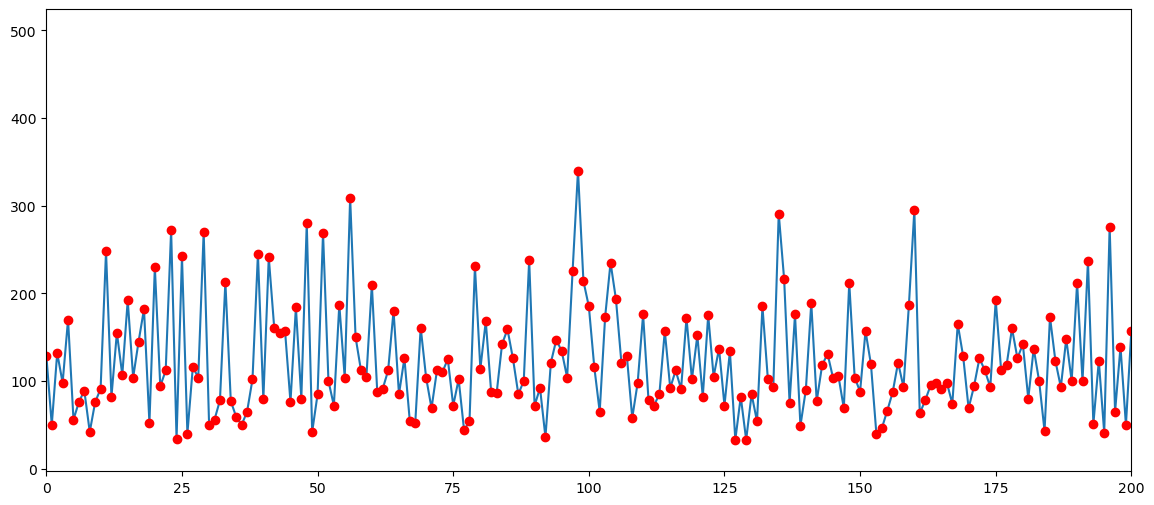

In [74]:
plot_prediction(y_train, tree_ytrain_d)

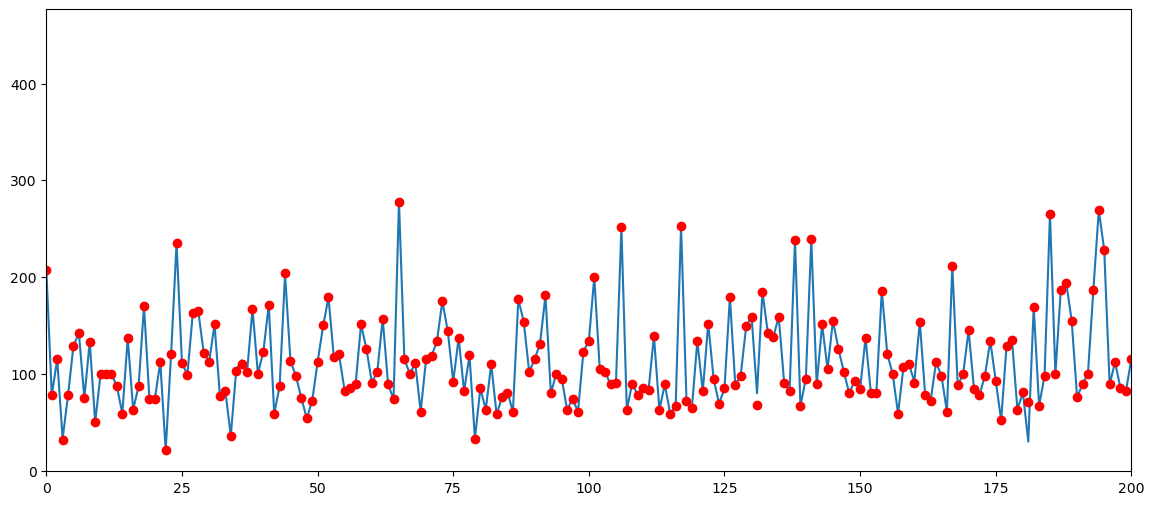

In [75]:
plot_prediction(y_test, tree_ytest_d)

Overfitting trên cả trainset và testset

# RandomForest

In [76]:
# more powerful model
from sklearn.ensemble import RandomForestRegressor

In [77]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
forest_ytrain_p = forest_reg.predict(X_train)

In [79]:

mse_train = mean_squared_error(y_train, forest_ytrain_p)
rmse_train = np.sqrt(mse_train)
rmse_train

0.8480682348382729

In [80]:
# test set
forest_ytest_p = forest_reg.predict(X_test)

In [81]:
mse_test = mean_squared_error(y_test, forest_ytest_p)
rmse_test = np.sqrt(mse_test)
rmse_test

3.0682601917136387

In [82]:
add_stats(model='randomforest reg',
         train_rmse=rmse_train,
         test_rmse=rmse_test)
results

{'linear reg': {'train_rmse': 25.0, 'test_rmse': 24.4},
 'decisiontree reg': {'train_rmse': 0.0, 'test_rmse': 3.5},
 'randomforest reg': {'train_rmse': 0.8, 'test_rmse': 3.1}}

Nhận xét: Linear regression không phù hợp

# Cross validation

In [83]:
from sklearn.model_selection import cross_val_score


In [84]:
scores = cross_val_score(tree_reg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)

In [85]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([3.02703366, 1.64459245, 1.72969748, 6.0871137 , 1.92369722,
       2.93063043, 4.61784471, 0.94328994, 3.16743635, 2.78076483])

In [86]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [87]:
display_scores(scores)

Scores:  [ -9.16293279  -2.70468432  -2.99185336 -37.05295316  -3.700611
  -8.5885947  -21.3244898   -0.88979592 -10.03265306  -7.73265306]
Mean:  -10.418122116463692
Standard Deviation:  10.446083609745145


In [88]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring='neg_mean_squared_error', cv=10)


In [89]:
display_scores(lin_scores)

Scores:  [-679.45871269 -688.99174453 -639.37888242 -649.31714081 -585.25831531
 -628.75461244 -645.31270344 -537.40917237 -593.06079937 -665.97020457]
Mean:  -631.291228794195
Standard Deviation:  44.54200554371601


In [90]:
# how about on test set:
for model in [lin_reg, tree_reg, forest_reg]:
    scores = cross_val_score(model, X_test, y_test,
                             scoring='neg_mean_squared_error', cv=10)
    display_scores(scores)
    print('-'*40)


Scores:  [-543.6984275  -471.05013486 -609.06488859 -517.75737349 -705.52342979
 -640.44463115 -529.1839739  -705.3691354  -571.65118508 -713.33111818]
Mean:  -600.7074297932594
Standard Deviation:  83.17155545262578
----------------------------------------
Scores:  [ -6.75619835  -5.45041322  -2.51652893  -4.17355372 -43.05785124
 -15.69421488 -12.05371901 -21.61410788 -32.26556017 -11.83817427]
Mean:  -15.542032166249445
Standard Deviation:  12.559914525101496
----------------------------------------
Scores:  [ -2.55799876  -2.08750207  -2.84440083  -4.79354917 -42.69688595
 -10.62540331  -3.50820165  -4.150561   -40.00802863  -5.67831909]
Mean:  -11.895085044923015
Standard Deviation:  14.917717095040542
----------------------------------------


# Save model

In [91]:
!pip install joblib

In [92]:
# just in case you want to save your work
import joblib

In [93]:
import os
os.makedirs('/home/thu/LaptrinhAI/Final_term/model')

In [94]:
joblib.dump(forest_reg, '/home/thu/LaptrinhAI/Final_term/model/forest_reg.pkl' )

['/home/thu/LaptrinhAI/Final_term/model/forest_reg.pkl']

# Grid Search

In [95]:
# we want to model performs better, in this case we tune the hyperparameters
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]


In [97]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                          return_train_score=True)

In [98]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [99]:
# and see the best estimator
grid_search.best_estimator_


RandomForestRegressor(max_features=8, n_estimators=30)

In [100]:
# or best parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [101]:
# or see the how each combination has worked
cvres = grid_search.cv_results_

In [102]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(round(np.sqrt(-mean_score),2), params)

11.09 {'max_features': 2, 'n_estimators': 3}
10.06 {'max_features': 2, 'n_estimators': 10}
9.25 {'max_features': 2, 'n_estimators': 30}
7.1 {'max_features': 4, 'n_estimators': 3}
5.62 {'max_features': 4, 'n_estimators': 10}
5.61 {'max_features': 4, 'n_estimators': 30}
4.67 {'max_features': 6, 'n_estimators': 3}
4.14 {'max_features': 6, 'n_estimators': 10}
4.02 {'max_features': 6, 'n_estimators': 30}
3.84 {'max_features': 8, 'n_estimators': 3}
3.49 {'max_features': 8, 'n_estimators': 10}
3.24 {'max_features': 8, 'n_estimators': 30}
13.16 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
9.21 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
7.88 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
7.19 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
6.7 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
5.23 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


Nhận xét: Trường hợp tốt nhất với dự báo ngẫu nhiên là 5.4.10^-6(g/m3)

# Analyze model

In [103]:
# could look back to see how the weight of each input
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.70835421e-04, 4.77198275e-03, 9.79315602e-02, 8.96465900e-01,
       6.58684001e-06, 1.14174507e-04, 1.56515223e-04, 1.85180385e-04,
       9.72647655e-05])

In [104]:
sorted(zip(feature_importances, X.columns), reverse=True)


[(0.8964658998959992, 'PM25'),
 (0.09793156021061043, 'PM10'),
 (0.004771982752723431, 'O3'),
 (0.0002708354214791486, 'NO2'),
 (0.00018518038461854118, 'Temperature'),
 (0.00015651522254239315, 'Relative Humidity'),
 (0.00011417450656576863, 'Pressure'),
 (9.72647654536038e-05, 'Wind Speed'),
 (6.58684000738584e-06, 'Precipitation')]

In [105]:
# let see how grid search performs
# train set
grid_ytrain_p = grid_search.predict(X_train)
grid_mse = mean_squared_error(y_train, grid_ytrain_p)
grid_train_rmse = np.sqrt(grid_mse)
grid_train_rmse

1.0770016290358908

In [106]:
# let see how the prediction look like after hypertunning
# test set
grid_ytest_p = grid_search.predict(X_test)
grid_test_mse = mean_squared_error(y_test, grid_ytest_p)
grid_test_rmse = np.sqrt(grid_test_mse)
grid_test_rmse

2.973249079032087

In [107]:
# still more to work with, but let bag the result for later comparison
add_stats(model='gridsearch',
         train_rmse=grid_train_rmse,
         test_rmse=grid_test_rmse)
results

{'linear reg': {'train_rmse': 25.0, 'test_rmse': 24.4},
 'decisiontree reg': {'train_rmse': 0.0, 'test_rmse': 3.5},
 'randomforest reg': {'train_rmse': 0.8, 'test_rmse': 3.1},
 'gridsearch': {'train_rmse': 1.1, 'test_rmse': 3.0}}

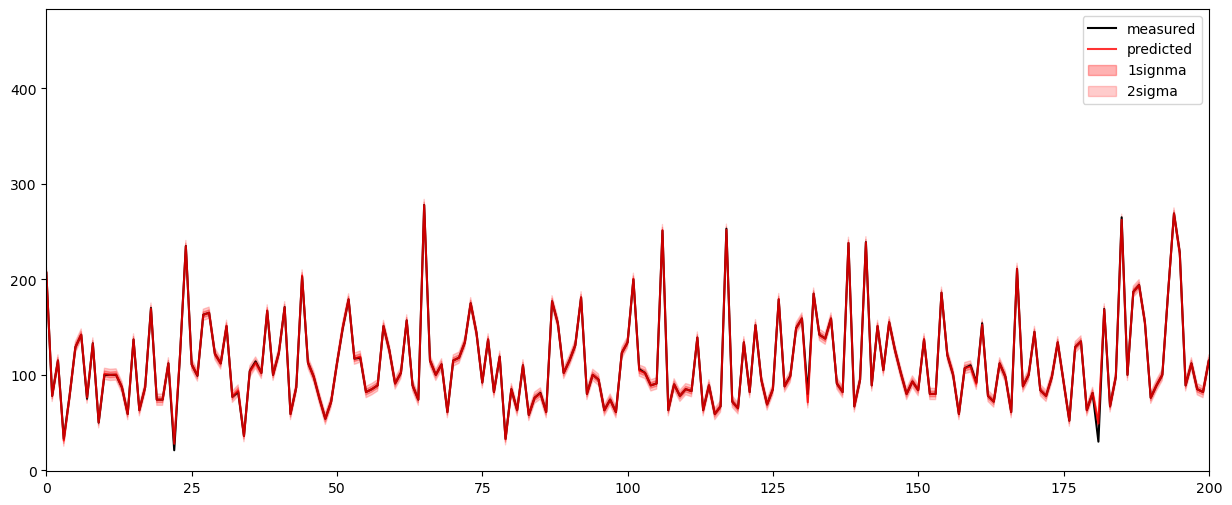

In [108]:
# let visualize it
std_ = grid_test_rmse
xindex = np.arange(0, len(y_test))
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(y_test.to_list(), color='black', label='measured')
ax.plot(grid_ytest_p, color='red', alpha=0.8, label='predicted')
ax.fill_between(xindex, grid_ytest_p-std_,grid_ytest_p+std_,
                color='red', alpha=0.3, label='1signma' )
ax.fill_between(xindex, grid_ytest_p-2*std_,grid_ytest_p+2*std_,
                color='red', alpha=0.2, label = '2sigma')
ax.set_xlim(0,200)
ax.legend()

*Nhận* xét: Ta có thể thấy mô hình của Grid hoạt động khá tốt, biên độ rất nhỏ

# Scipy interval 95%

In [109]:
# let use stats from scipy library
from scipy import stats

In [110]:
# and look confidence of .95, or the area that a value will be inside the range with 95 chances of 100
confidence = 0.95

In [111]:
squared_errors = (grid_ytest_p - y_test)**2

In [112]:
np.sqrt(stats.t.interval(
    confidence,
    len(squared_errors)-1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)))

array([1.26844543, 4.00892334])

- so we are pretty sure that standard deviation from grid search is from 1.3 to 4
- how confidience: 95 chances out of 100, this RMSE will be within this range

# Ensemble Methods

In [113]:
# let look at a final approach to combine three regression we have so far using Voting method
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

In [114]:
from sklearn.tree import DecisionTreeRegressor


In [115]:
# re-define an instance, all training in the previous sessions are gone
lin_reg  = LinearRegression()
tree_reg = DecisionTreeRegressor()
rnd_reg = RandomForestRegressor()


In [116]:
# and make each model as an parameter for then ensemble (voting)
voting_reg = VotingRegressor(
    estimators=[('lin', lin_reg),
               ('rnd', rnd_reg),
               ('tree', tree_reg)
               ],
)


In [117]:
# train model by the train set
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lin', LinearRegression()),
                            ('rnd', RandomForestRegressor()),
                            ('tree', DecisionTreeRegressor())])

In [118]:
# check estimator (paramters)
voting_reg.estimators_


[LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor()]

In [119]:
# now we do predicting on the test set
y_entest_p = voting_reg.predict(X_test)

In [120]:
mse = mean_squared_error(y_entest_p, y_test)
en_test = np.sqrt(mse)


In [121]:
# we could run on train set
y_entrain_p = voting_reg.predict(X_train)
mse = mean_squared_error(y_entrain_p, y_train)
en_train = np.sqrt(mse)

In [122]:
en_test, en_train

(8.387459620733894, 8.356796155767482)

In [123]:
# still in 21 for test set
add_stats(model='voting reg',
         train_rmse=en_train,
         test_rmse=en_test)
results

{'linear reg': {'train_rmse': 25.0, 'test_rmse': 24.4},
 'decisiontree reg': {'train_rmse': 0.0, 'test_rmse': 3.5},
 'randomforest reg': {'train_rmse': 0.8, 'test_rmse': 3.1},
 'gridsearch': {'train_rmse': 1.1, 'test_rmse': 3.0},
 'voting reg': {'train_rmse': 8.4, 'test_rmse': 8.4}}

(200.0, 300.0)

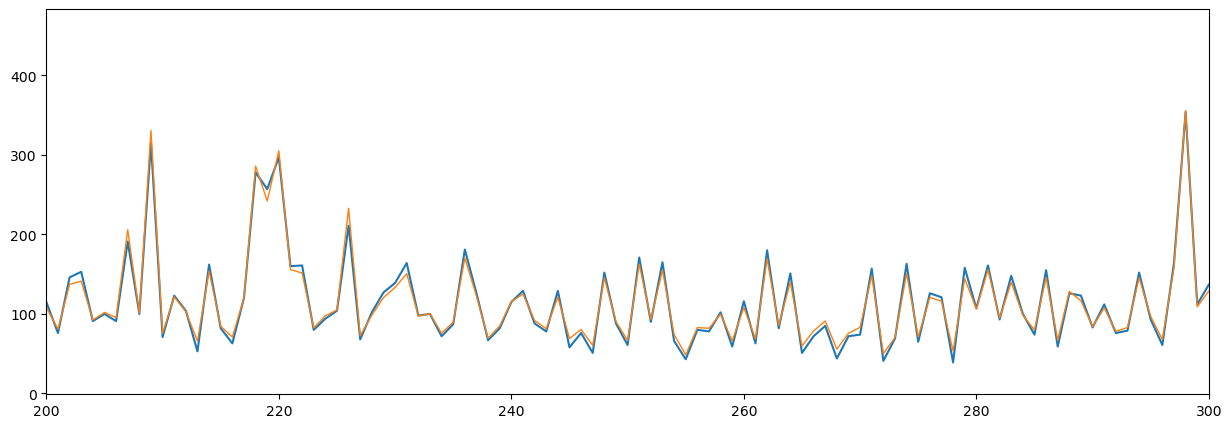

In [124]:
# let visualize the data from Ensemble with test set
plt.figure(figsize=(15,5))
plt.plot(y_test.to_list())
plt.plot(y_entest_p, lw=1)
plt.xlim(200,300)

- so we can get a RMSE = 20 from several model, which is about 50% as the relative standard deviation
- this dataset is combined from several source, but not easy to get from a forecast product (in fact, I am struggling to get those), so we will try out a dataset with less feastures,

# DarkSky Dataset

- you can check out this API at DarkSky.net. After acquired by Apple, the future of this open API is unsure. The registration is closed as well. Alternatively, check out OpenWeatherMap.org


## Merge data

In [125]:
# load data in
dk = pd.read_csv('/home/thu/LaptrinhAI/Final_term/darksky_hanoi_2018.csv', parse_dates=['time'], index_col=['time'])

In [131]:
dk.shape

(8745, 17)

In [127]:
# select few important columsn
cols = ['temperature', 'dewpoint', 'humidity', 'pressure', 'precipintensity','cloudcover', 'visibility', 'windspeed']

In [128]:
dkt = dk[cols]

In [129]:
# load PM2.5 data
pm = pd.read_csv('data/cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv',
                parse_dates=['Date (LT)'],
                index_col=['Date (LT)'])


FileNotFoundError: [Errno 2] No such file or directory: 'data/cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv'

In [ ]:
pm.head()

In [ ]:
# check duplicated data if you want, wait, this is too much
dkt.duplicated().sum()


In [ ]:
dkt.info()

In [ ]:
# let sort index (datetime) first
dkt.sort_index(inplace=True)

- they are matched exact, but dropping them will need to fill in more data later, so it is okay to keep the closest values in by adjacent rows

In [ ]:
# merge data
df = pd.merge(pm, dkt, right_index=True, left_index=True, how='left')

In [ ]:
df.info()

In [ ]:
# quick check correlation
df.corr()['pm25'].sort_values()

In [ ]:
# seperate feature and label
X = df.drop('pm25', axis=1)
y = df['pm25'].copy()

In [ ]:
X_scaled = inpute_transfrom(data=X)

In [ ]:
type(X_scaled)

# Split train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.33, random_state=2020)

In [ ]:
len(X_train), len(y_train)

In [ ]:
len(X_test), len(y_test)

# Train and validate

In [ ]:
# I will jump in and use voting (seem safer)
lin_reg  = LinearRegression()
tree_reg = DecisionTreeRegressor()
rnd_reg = RandomForestRegressor()
voting_reg = VotingRegressor(
    estimators=[('lin', lin_reg),
               ('rnd', rnd_reg),
               ('tree', tree_reg)
               ],
)

In [ ]:
voting_reg.fit(X_train, y_train)

In [ ]:
voting_reg.estimators_

## Trainset

In [ ]:
y_entrain_p = voting_reg.predict(X_train)


In [ ]:
mse = mean_squared_error(y_entrain_p, y_train)
train_std = np.sqrt(mse)
train_std

In [ ]:
y_train.iloc[0:100]

In [ ]:
from random import randint

In [ ]:
# time to invest some good graphs
def plot_results(label=None, prediction=None, std_=None, points=100, savefig=False):
    plt.style.use('default')
    plt.rcParams['font.size'] = 12
    start = randint(0, len(label)-points)
    end = start + points
    label_ = label.iloc[start:end]
    pred_ = prediction[start:end]
    xindex = np.arange(0,len(label_),1)

    plt.figure(figsize=(10,6))
    plt.plot(label_.to_list(), 'ko--',lw=0.5, label='measured')
    plt.plot(pred_, lw=1, color='#922B21', label='predicted')
    plt.fill_between(xindex, pred_- std_, pred_+std_,
                    color='#5499C7', alpha=0.6, label = '$\pm1 \sigma$')

    max_ = np.max([label_.max(), np.max(pred_)])
    plt.ylim(0, 1.1*max_)
    plt.ylabel('Concentration, $\mu g/m^3$')
    plt.title('Measured and predicted $PM_{2.5}$ using Ensemble regression',
              y=1.05, weight='bold')
    plt.xlabel('Hour, site: Hanoi, 2018')
    plt.legend(ncol=3)
    if savefig:
        plt.tight_layout()
        plt.savefig(f'img/en_reg_{start}.png', optimize=True)
    return None

In [ ]:
plot_results(label=y_train, prediction=y_entrain_p,
             std_=train_std, savefig=True)

## Testset

In [ ]:
y_entest_p = voting_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_entest_p, y_test)
test_std = np.sqrt(mse)
mse, test_std


In [ ]:
add_stats(model='voting reg (Darksky)',
         train_rmse=train_std,
         test_rmse=test_std)
results

- not much worse, in fact, with less parameters and get a similar outcome, that is actually encouraging


In [ ]:
plot_results(label=y_test,
             prediction=y_entest_p, std_=test_std, savefig=True)

# RMSE

- again, this is Root Mean Squared Error. If we assumed the errors is random, then the distribution of error to the mean value shouls be in standard distribution (Gaussian Distribution). Then the RMSE is the Standard Deviation (SD). The ratio of SD to the mean value in percent is called Relative Standard Deviation.

In [ ]:
df = pd.DataFrame(data=results)

In [ ]:
df

In [ ]:
df2 = df.transpose()

In [ ]:
df2

In [ ]:
plt.style.use('seaborn-whitegrid')

In [ ]:
bw = 0.3
idx = np.arange(len(df2))
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(idx-bw/2, df2['train_rmse'], bw, color='gray', label='train_set')
ax.bar(idx+bw/2, df2['test_rmse'], bw, color='navy', alpha=0.8, label='test_set')
ax.set_xticklabels(['','Linear', 'DecisionTree', 'RandomForest',
                    'Grid Search', 'Voting', 'Voting (DK*)'],
                  rotation=25)
ax.set_xlabel('Regression model, *DK: applied on DarkSky dataset; others: mixed-bag')
ax.set_title('Root Squared Mean Errors with $PM_{2.5}$ prediction\
             \n with meteorological parameters for Hanoi, 2018',
            y=1.05,
            weight='bold')
# labels = ax.get_xticklabels()
ax.set_ylabel('RMSE in $\mu g/m^3$')
ax.legend(frameon=True, ncol=2)
fig.tight_layout()
fig.savefig('img/2020Aug_rmse_raw.png')

In [ ]:
pm['pm25'].mean()

In [ ]:
df3 = df2*100/pm['pm25'].mean()

In [ ]:
df3

In [ ]:
bw = 0.3
idx = np.arange(len(df3))
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(idx-bw/2, df3['train_rmse'], bw, color='gray', label='train_set')
ax.bar(idx+bw/2, df3['test_rmse'], bw, color='navy', alpha=0.8, label='test_set')
ax.set_xticklabels(['','Linear', 'DecisionTree', 'RandomForest',
                    'Grid Search', 'Voting', 'Voting (DK*)'],
                  rotation=25)
ax.set_xlabel('Regression model, *DK: applied on DarkSky dataset; others: mixed (MERRA-2, ISD)')
ax.set_title('$PM_{2.5}$ prediction\n with meteorological parameters for Hanoi, 2018',
             y=1.05,
            weight='bold')
# labels = ax.get_xticklabels()
ax.set_ylabel('Relative Standard Deviation, %')
ax.legend(frameon=True, ncol=2)
fig.tight_layout()
# fig.tight_layout(rect=(0.1,0.1,0.95, 0.95))
fig.savefig('img/2020Aug_rmse_rsd.png')